In [1]:
# https://github.com/alan-turing-institute/sktime/blob/139b9291fb634cce367f714a6132212b0172e199/sktime/forecasting/base/_fh.py

In [2]:
# Pre Release
import sys

sys.path.append(os.environ["DEV_SKTIME"])

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

from sktime.forecasting.all import *

%matplotlib inline

In [4]:
y = load_airline()
display(y)

Period
1949-01    112.0
1949-02    118.0
1949-03    132.0
1949-04    129.0
1949-05    121.0
           ...  
1960-08    606.0
1960-09    508.0
1960-10    461.0
1960-11    390.0
1960-12    432.0
Freq: M, Name: Number of airline passengers, Length: 144, dtype: float64

108 36


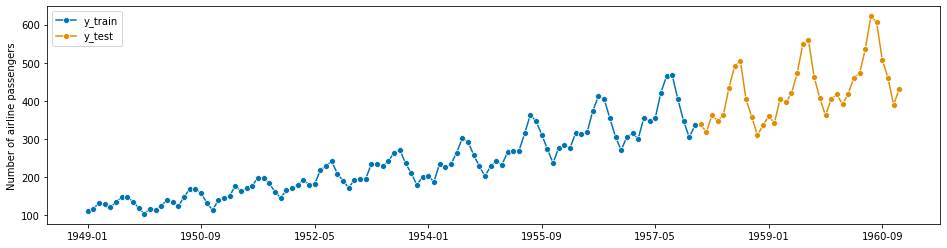

In [5]:
y_train, y_test = temporal_train_test_split(y, test_size=36)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [6]:
help(ForecastingHorizon)

Help on class ForecastingHorizon in module sktime.forecasting.base._fh:

class ForecastingHorizon(builtins.object)
 |  Forecasting horizon
 |  
 |  Parameters
 |  ----------
 |  values : pd.Index, np.array, list or int
 |      Values of forecasting horizon
 |  is_relative : bool, optional (default=True)
 |      - If True, values are relative to end of training series.
 |      - If False, values are absolute.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, values=None, is_relative=True)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __repr__(self)
 |      Return repr(self).
 |  
 |  is_all_in_sample(self, cutoff=None)
 |      Whether or not the forecasting horizon is purely in-sample for given
 |      cutoff.
 |      
 |      Parameters
 |      ----------
 |      cutoff : pd.Period, pd.Timestamp, int, optional (default=None)
 |          Cutoff value is required to convert a relative forecasting
 |          horizon to an absolute one and vice versa

In [7]:
print(type(y_test.index))
print(type(y_test.index.to_timestamp()))

print(type(y_test.index[0]))
print(type(y_test.index.to_timestamp()[0]))

print((y_test.index))
print((y_test.index.to_timestamp()))

<class 'pandas.core.indexes.period.PeriodIndex'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>
<class 'pandas._libs.tslibs.period.Period'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
PeriodIndex(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M')
DatetimeIndex(['1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '

### `is_relative` = True

In [8]:
fh1 = ForecastingHorizon(np.arange(len(y_test)) + 1, is_relative=True)
fh1

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

In [9]:
# So what is the difference between is_relative = True and False. Does it only show up after the trainig is complete?
fh1_ = ForecastingHorizon(np.arange(len(y_test)) + 1, is_relative=False)
fh1_

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=False)

In [10]:
help(fh1.to_in_sample)
help(fh1.to_out_of_sample)

Help on method to_in_sample in module sktime.forecasting.base._fh:

to_in_sample(cutoff=None) method of sktime.forecasting.base._fh.ForecastingHorizon instance
    Return in-sample values
    Parameters
    ----------
    cutoff : pd.Period, pd.Timestamp, int, optional (default=None)
        Cutoff value is required to convert a relative forecasting
        horizon to an absolute one and vice versa.
    
    Returns
    -------
    fh : ForecastingHorizon
        In-sample values of forecasting horizon

Help on method to_out_of_sample in module sktime.forecasting.base._fh:

to_out_of_sample(cutoff=None) method of sktime.forecasting.base._fh.ForecastingHorizon instance
    Return out-of-sample values
    Parameters
    ----------
    cutoff : pd.Period, pd.Timestamp, int, optional (default=None)
        Cutoff value is required to convert a relative forecasting
        horizon to an absolute one and vice versa.
    
    Returns
    -------
    fh : ForecastingHorizon
        Out-of-samp

In [11]:
print(
    f"In Sample: {fh1.to_in_sample()}"
)  # Anything before this cutoff is in-sample (train)
print(
    f"Out Sample: {fh1.to_out_of_sample()}"
)  # Anything before this cutoff is out-of-sample (val)

In Sample: ForecastingHorizon([], dtype='int64', is_relative=True)
Out Sample: ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)


In [12]:
help(fh1._is_in_sample)
help(fh1._is_out_of_sample)

Help on method _is_in_sample in module sktime.forecasting.base._fh:

_is_in_sample(cutoff=None) method of sktime.forecasting.base._fh.ForecastingHorizon instance
    Get index location of in-sample values

Help on method _is_out_of_sample in module sktime.forecasting.base._fh:

_is_out_of_sample(cutoff=None) method of sktime.forecasting.base._fh.ForecastingHorizon instance
    Get index location of out-of-sample values



In [13]:
point = 10
print(f"Time point '{point}' is in sample?: {fh1._is_in_sample(point)}")
print(f"Time point '{point}' is out of sample?: {fh1._is_out_of_sample(point)}")

Time point '10' is in sample?: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Time point '10' is out of sample?: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


In [14]:
# What does this mean?
point = -10
print(f"Time point '{point}' is in sample?: {fh1._is_in_sample(point)}")
print(f"Time point '{point}' is out of sample?: {fh1._is_out_of_sample(point)}")

Time point '-10' is in sample?: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]
Time point '-10' is out of sample?: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True]


#### Data Formats

In [15]:
print(fh1.to_pandas())
print()
print(fh1.to_numpy())

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36]


#### Relative to Absolute and Vice Versa

In [16]:
# Our Init has 36 indices for the forecast horizon.
# The code below will 36 indices from 10 onwards (absolute values)
fh1.to_absolute(cutoff=10)

ForecastingHorizon([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
            28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
            45, 46],
           dtype='int64', is_relative=False)

In [17]:
# Since this is already relative, it just returns the indices
fh1.to_relative()

ForecastingHorizon([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36],
           dtype='int64', is_relative=True)

##### `to_absolute_int`

In [18]:
for start in np.arange(-2, 2):
    print(f"\nStart: {start}")
    print(fh1.to_absolute_int(start=start, cutoff=10))


Start: -2
ForecastingHorizon([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
            30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46,
            47, 48],
           dtype='int64', is_relative=False)

Start: -1
ForecastingHorizon([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28,
            29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
            46, 47],
           dtype='int64', is_relative=False)

Start: 0
ForecastingHorizon([11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
            28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
            45, 46],
           dtype='int64', is_relative=False)

Start: 1
ForecastingHorizon([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
            27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
            44, 45],
           dtype='int64', is_relative=False)


### `is_relative` = False

In [23]:
fh2 = ForecastingHorizon(y_test.index, is_relative=False)
fh2

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)

In [25]:
print(
    f"In Sample: {fh2.to_in_sample(cutoff=y_test.index[-7])}"
)  # Anything before this cutoff is in-sample (train)
print(
    f"Out Sample: {fh2.to_out_of_sample(cutoff=y_test.index[-7])}"
)  # Anything before this cutoff is out-of-sample (val)

In Sample: ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)
Out Sample: ForecastingHorizon(['1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'], dtype='period[M]', name='Period', freq='M', is_relative=False)


In [26]:
point = y_test.index[-12] + 1
print(f"Time point '{point}' is in sample?: {fh2._is_in_sample(point)}")
print(f"Time point '{point}' is out of sample?: {fh2._is_out_of_sample(point)}")

Time point '1960-02' is in sample?: [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False False False False False False False False False False]
Time point '1960-02' is out of sample?: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True]


In [89]:
print(fh2.to_pandas())
print()
print(fh2.to_numpy())

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', length=144, freq='M')

[Period('1949-01', 'M') Period('1949-02', 'M') Period('1949-03', 'M')
 Period('1949-04', 'M') Period('1949-05', 'M') Period('1949-06', 'M')
 Period('1949-07', 'M') Period('1949-08', 'M') Period('1949-09', 'M')
 Period('1949-10', 'M') Period('1949-11', 'M') Period('1949-12', 'M')
 Period('1950-01', 'M') Period('1950-02', 'M') Period('1950-03', 'M')
 Period('1950-04', 'M') Period('1950-05', 'M') Period('1950-06', 'M')
 Period('1950-07', 'M') Period('1950-08', 'M') Period('1950-09', 'M')
 Period('1950-10', 'M') Period('1950-11', 'M') Period('1950-12', 'M')
 Period('1951-01', 'M') Period('1951-02', 'M') Period('1951-03', 'M')
 Period('19

#### Relative to Absolute and Vice Versa

In [27]:
# Since this is already absolute, it just returns the indices
fh2.to_absolute(cutoff=10)

ForecastingHorizon(['1958-01', '1958-02', '1958-03', '1958-04', '1958-05', '1958-06',
             '1958-07', '1958-08', '1958-09', '1958-10', '1958-11', '1958-12',
             '1959-01', '1959-02', '1959-03', '1959-04', '1959-05', '1959-06',
             '1959-07', '1959-08', '1959-09', '1959-10', '1959-11', '1959-12',
             '1960-01', '1960-02', '1960-03', '1960-04', '1960-05', '1960-06',
             '1960-07', '1960-08', '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', name='Period', freq='M', is_relative=False)

In [28]:
# Converts the indices before the cutoff to negative indices (in sample)
# and the indices after the cutoff to positive indices (out of sample)
fh2.to_relative(cutoff=y.index[-7])

ForecastingHorizon([-29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17,
            -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
             -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6],
           dtype='int64', is_relative=True)